In [3]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("ComplexHeatmap")
# install.packages(c('ClusterR','tidyverse'))
suppressMessages(require(ComplexHeatmap))
suppressMessages(require(tidyverse))
suppressMessages(require(data.table))
require(ClusterR)
require(pracma)

In [8]:
source('~/git_projects/common_libs/mylibs.R')

In [35]:
(meta<- fread("../data_processed/meta_data.csv"))%>% head(1)

V1,Time_BiosetID,Day Post-Infection,Species,"GEO ID, link",Study name,Bioset name,Test Samples,Control Samples,Feature Size,⋯,Viral Dose (PFUs),Viral Severity,"Sample Source (strain, cell)",Host Mouse Strain,Sex,Host Age Category,Host Age Cat,Host Age,Technology,Lab
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.5_867451,0.5,Mus musculus,GSE36969,Lungs from aged and young mice infected with mouse adapted SARS strains (Timecourse),Lungs from 1yr old (aged) mice - 12hr post SARS MA15 strain infection _vs_ mock (PBS) infection,3,3,627,⋯,10000,,Lung,BALB/c,female,aged,3-aged (52 weeks old),1yr,Agilent-014868 Whole Mouse Genome Microarray 4x44K G4122F,Michael Katze - University of Washington


In [37]:
fread("../data_processed/meta_data.csv") %>% select(-V1) %>% head(1)

Time_BiosetID,Day Post-Infection,Species,"GEO ID, link",Study name,Bioset name,Test Samples,Control Samples,Feature Size,Article PubMed ID,⋯,Viral Dose (PFUs),Viral Severity,"Sample Source (strain, cell)",Host Mouse Strain,Sex,Host Age Category,Host Age Cat,Host Age,Technology,Lab
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.5_867451,0.5,Mus musculus,GSE36969,Lungs from aged and young mice infected with mouse adapted SARS strains (Timecourse),Lungs from 1yr old (aged) mice - 12hr post SARS MA15 strain infection _vs_ mock (PBS) infection,3,3,627,19420084,⋯,10000,,Lung,BALB/c,female,aged,3-aged (52 weeks old),1yr,Agilent-014868 Whole Mouse Genome Microarray 4x44K G4122F,Michael Katze - University of Washington


In [40]:
pca_pd <- pca_res$rotation[, 1:3] %>% as.data.frame %>% rownames_to_column("Time_BiosetID") %>% 
    left_join(fread("../data_processed/meta_data.csv") %>% select(-V1))

Joining, by = "Time_BiosetID"



,Time_BiosetID,PC1,PC2,PC3,Day Post-Infection,Species,"GEO ID, link",Study name,Bioset name,Test Samples,⋯,Viral Dose (PFUs),Viral Severity,"Sample Source (strain, cell)",Host Mouse Strain,Sex,Host Age Category,Host Age Cat,Host Age,Technology,Lab
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.5_867451,0.02078529,-0.02742849,0.03217689,0.5,Mus musculus,GSE36969,Lungs from aged and young mice infected with mouse adapted SARS strains (Timecourse),Lungs from 1yr old (aged) mice - 12hr post SARS MA15 strain infection _vs_ mock (PBS) infection,3,⋯,10000,,Lung,BALB/c,female,aged,3-aged (52 weeks old),1yr,Agilent-014868 Whole Mouse Genome Microarray 4x44K G4122F,Michael Katze - University of Washington


In [67]:
install.packages("plotly")

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’


Warning message in install.packages("plotly"):
“installation of package ‘later’ had non-zero exit status”
Warning message in install.packages("plotly"):
“installation of package ‘promises’ had non-zero exit status”
Warning message in install.packages("plotly"):
“installation of package ‘plotly’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



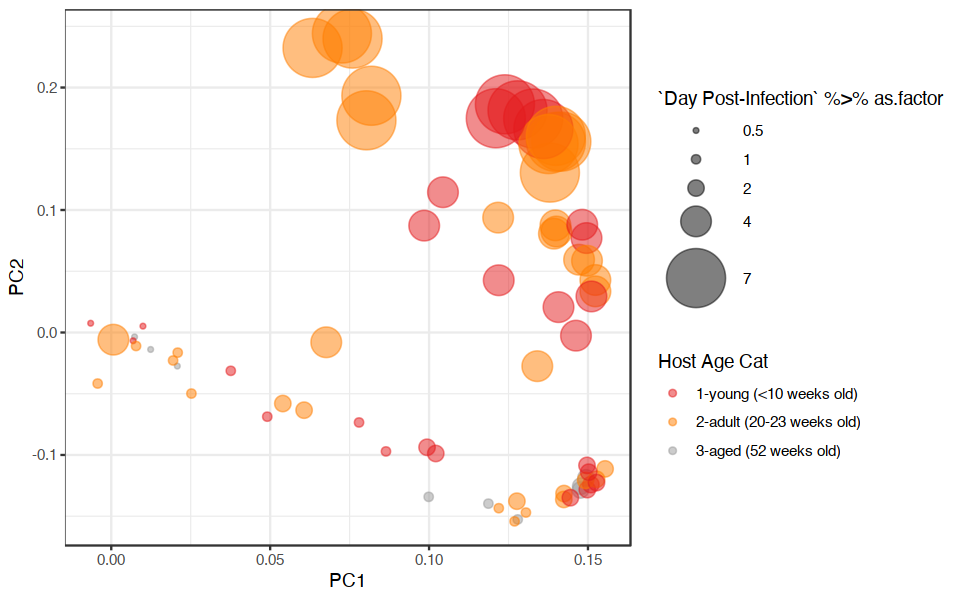

In [63]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(pca_pd %>% as.data.frame, aes(PC1, PC2)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Host Age Cat`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))

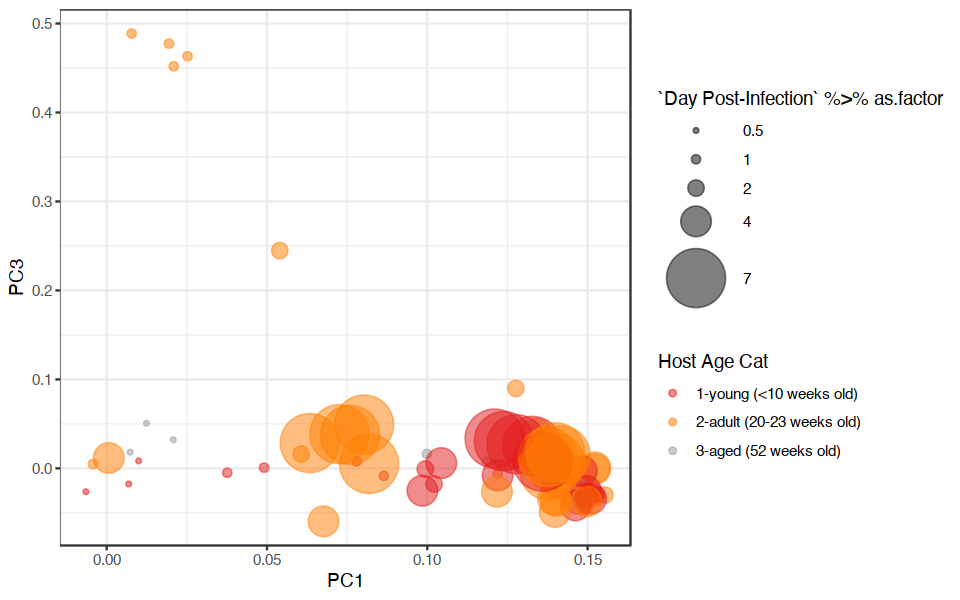

In [65]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(pca_pd %>% as.data.frame, aes(PC1, PC3)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Host Age Cat`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))

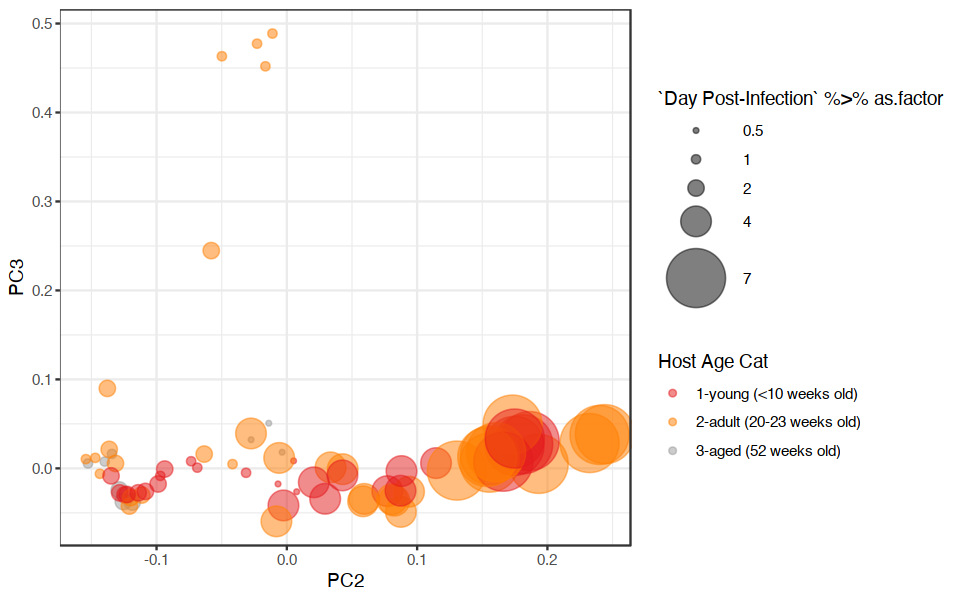

In [64]:
options(repr.plot.width = 8, repr.plot.height = 5)

ggplot(pca_pd %>% as.data.frame, aes(PC2, PC3)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Host Age Cat`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74
0.5_867451,0.020785286,-0.027428487,0.032176888,-0.0270223454,0.12802540,-0.4375434,-0.29111856,0.08435509,-0.1795922,0.01295918,⋯,-0.0030079691,-0.0032002871,0.0015526118,0.0009805690,0.0067857137,0.002286374,0.0017614400,-0.0019709469,-0.0023386265,0.0003668839
0.5_867454,0.007335720,-0.003617721,0.018123747,-0.0386146960,0.04346055,-0.2457115,-0.35764255,0.23925195,-0.1322932,-0.09284399,⋯,-0.0025609651,0.0005160523,-0.0022624376,0.0035794675,-0.0008778015,0.000980112,-0.0025870101,0.0002546930,-0.0008459821,-0.0009254210
0.5_867457,0.012393689,-0.013866873,0.050732507,-0.0299591554,0.10851094,-0.3793443,-0.42613901,0.13227168,-0.1950761,-0.01351051,⋯,0.0034842023,-0.0013551850,0.0047503820,0.0017567223,-0.0019375934,-0.003779767,0.0047148364,-0.0007395503,-0.0001130861,-0.0007127006
0.5_867478,0.006878222,-0.006766293,-0.017509030,-0.0005489178,-0.03603654,0.1003416,0.13730349,0.45249185,-0.2389492,0.08741379,⋯,-0.0039374285,-0.0027704778,-0.0001946726,0.0007928929,-0.0027218342,0.001905931,0.0010870519,0.0019889784,-0.0002682754,-0.0004095757
0.5_867481,0.009971274,0.005174339,0.008434039,-0.0331696812,-0.06618011,0.2141965,0.07255202,0.43189184,-0.0199754,0.01002169,⋯,0.0011646734,-0.0003897484,-0.0032676369,0.0030798554,0.0010203136,0.004178563,0.0019631828,-0.0007197143,0.0023212956,-0.0010651527
0.5_867484,-0.006476839,0.007544185,-0.026285653,-0.0305285653,-0.05985893,0.1690033,0.16589584,0.51353570,-0.1662624,-0.17254001,⋯,-0.0009310713,-0.0005449171,0.0004611091,0.0016765860,0.0036742508,0.002422146,0.0001082661,0.0046067136,-0.0012685644,-0.0004772808


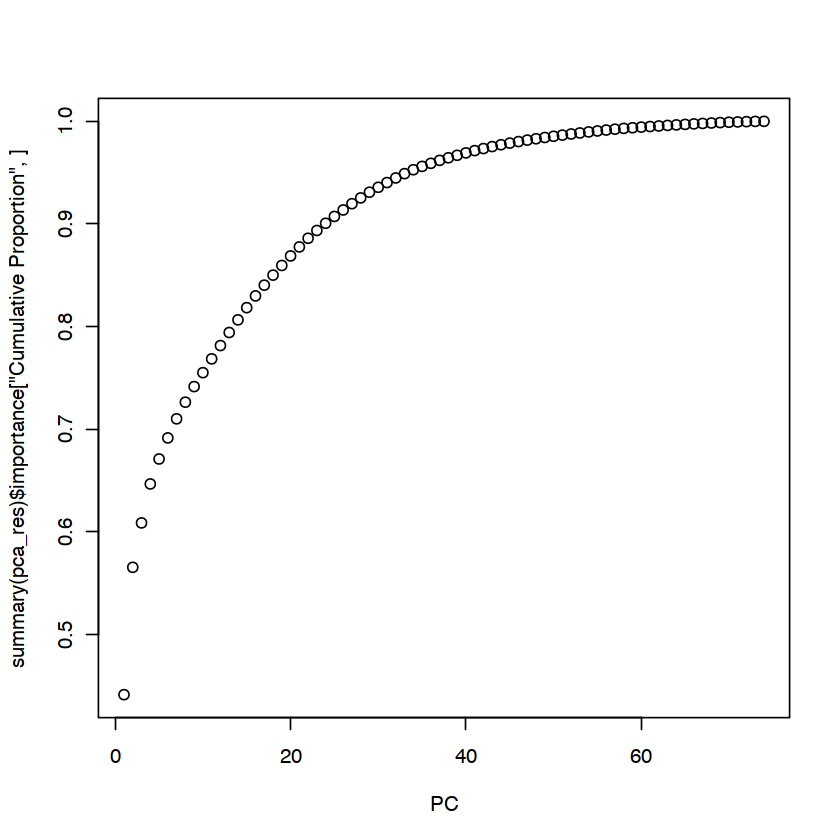

In [31]:
pca_res <- prcomp(dat, scale. = TRUE)
plot(1:74, summary(pca_res)$importance["Cumulative Proportion", ], xlab = "PC")
pca_res$rotation %>% head

In [15]:
(dat <- fread("../data_processed/plot_dat.csv") %>% column_to_rownames("V1")) %>% 
    head(1)

,0.5_867451,0.5_867454,0.5_867457,0.5_867478,0.5_867481,0.5_867484,1_926614,1_494014,1_494017,1_494020,⋯,7_685178,7_685217,7_821662,7_823408,7_839434,7_839446,7_833455,7_840319,7_834112,7_995287
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
March1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
plotPCA(dat)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘plotPCA’ for signature ‘"data.frame"’
